In [1]:
import sys
import os
sys.path.append("../../../")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import calendar
import torch
import ds_scratch.tools.GoogleAds.process_reports.process_any_report as process_any_report
import ds_scratch.tools.GoogleAds.keywords_embedding.bert_embedding as be
from transformers import AutoTokenizer, AutoModel
from scipy.spatial.distance import cosine


# Import Gads dataframe

In [2]:
df_gads = process_any_report.open_and_process("report_keywords",sea=True,start_date="2019-11")

In [3]:
keywords_list = df_gads["Keyword"].unique()

In [4]:
keywords_list = [keyword.replace("+","") for keyword in keywords_list]

# Get vectors of each keywords

In [5]:
tokenizer = AutoTokenizer.from_pretrained("camembert/camembert-large")
model = AutoModel.from_pretrained("camembert/camembert-large", output_hidden_states = True)

In [6]:
def compute_coordinates(keywords_list):
    vectors = []
    
    for token in keywords_list:
        print(token)
        marked_text = token
        tokenized_text = tokenizer.tokenize(marked_text)
        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
        tokens_tensor = torch.tensor([indexed_tokens])
        segments_ids = [1] * len(tokenized_text)
        segments_tensors = torch.tensor([segments_ids])
        model.eval()

        with torch.no_grad():
            outputs = model(tokens_tensor, segments_tensors)
            hidden_states = outputs[2]

        token_embeddings = torch.stack(hidden_states, dim=0)
        token_embeddings = torch.squeeze(token_embeddings, dim=1)
        token_embeddings = token_embeddings.permute(1,0,2)

        token_vecs_sum = []

        #for token in token_embeddings:
        #    sum_vec = torch.sum(token[-4:], dim=0)
        #    token_vecs_sum.append(sum_vec)

        token_vecs = hidden_states[-2][0]
        sentence_embedding = torch.mean(token_vecs, dim=0)
        vectors.append(sentence_embedding.tolist())
    df_vectors = pd.DataFrame([keywords_list,vectors]).transpose().rename(columns={0:"Keyword"}).set_index("Keyword")        
    for dim in range(len(vectors[0])):
        df_vectors.loc[:,dim] = [vectors[i][dim] for i in range(len(df_vectors))]
    return df_vectors

In [7]:
df_vectors = compute_coordinates(keywords_list)

comparateur prix de l électricité
activation compteur edf
electricité comparateur de prix
fournisseur electricité
autre fournisseur d électricité
changer de fournisseur electricité
edf souscrire contrat
comparateur fournisseur de gaz et electricité
comparatif abonnement gaz
fournisseur d énergie électrique
compteur edf changement de proprietaire
comparateur de prix électricité et gaz
abonnement gaz comparatif
comparateur distributeur energie
comparateur gaz et electricité
ouverture compteur electrique edf
fournisseurs d électricité en france
fournisseur de gaz
souscrire contrat electricité en ligne
fournisseur de gaz de ville
nouveau logement edf
comparatif de gaz
edf ouvrir un contrat
comparatif fournisseur d électricité
liste fournisseurs électricité
edf changement de propriétaire
edf ouverture ligne
offre electricité et gaz
qui est le moins cher gaz
comparateur fournisseur de gaz
meilleur fournisseur gaz electricite
meilleur prix du gaz
comparatif offre energie
gdf souscrire
operate

gaz et electricité que choisir
ouverture de compte edf
comparateur energie gaz
ouvrir contrat electricité
logement edf
fournisseur electricité et gaz
ouvrir edf nouveau logement
fournisseur electricite et gaz
comparateur de fournisseur d énergie
qui est le moins cher electricité
comparateur fournisseur électricité
liste fournisseur d énergie
comparer electricite tarif
electricité moins cher que choisir
fournisseur d électricité en france
fournisseurs d électricité comparatif
ouvrir un compte edf
comparateur offre energie
ouverture d un contrat edf
ouverture de ligne edf
edf déménagement compteur
activer compteur edf
electricite moins chere comparateur
prix ouverture compteur gaz
comment ouvrir un contrat edf
choisir fournisseur énergie
comparateur gaz électricité
choisir son fournisseur d électricité
quels sont les fournisseurs d électricité
changement de contrat edf
comparatif contrat electricité
ouverture edf en ligne
meilleur fournisseur de gaz
souscrire chez edf
comment ouvrir un c

edf déménagement délai
les fournisseurs d électricité en france
comparatif prix gaz naturel
changement de locataire compteur edf
choisir fournisseur gaz
distributeur electricite comparatif
comparatif énergie électricité
edf service demenagement
edf relevé de compteur déménagement
edf changement nom compteur
edf changement domicile
ouverture compteur edf gdf
liste des fournisseur d électricité
ouverture compteur gdf
demande ouverture compteur edf
ouverture gaz edf
edf démarche déménagement
ouvrir contrat edf telephone
les différents fournisseurs d électricité en france
souscrire un contrat electricité en ligne
électricité gaz quel fournisseur choisir
demarche edf demenagement
edf souscrire contrat en ligne
meilleur prix gaz et electricité
qui est le moins cher en electricité
fournisseur le moins cher en electricité
liste des fournisseurs électricité
comparer le prix du gaz
electricité et gaz quel fournisseur choisir
edf service client demenagement
ouvrir le gaz dans un appartement
compa

In [8]:
df_vectors.head()

,1,0,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
Keyword,,,,,,,,,,,,,,,,,,,,,
comparateur prix de l électricité,-0.015152,0.185373,0.247460,-0.026943,0.188209,0.074786,0.179396,-0.138918,-0.190184,-0.102457,...,-0.273148,0.138977,-0.072687,0.203893,-0.172835,0.117876,0.103585,0.022654,0.041828,0.201222
activation compteur edf,-0.007937,0.113689,0.054460,-0.065198,0.165653,0.085144,-0.113850,0.104261,0.110105,-0.080357,...,-0.022194,0.116230,-0.249184,0.023248,-0.108908,-0.046898,0.076999,0.052854,-0.152969,-0.035447
electricité comparateur de prix,0.191970,0.181558,-0.015003,0.102209,0.033177,0.196098,-0.082899,0.040133,0.010497,-0.098069,...,-0.070923,0.219195,-0.047077,0.114514,-0.125773,0.038290,0.054701,-0.101781,0.046498,0.265779
fournisseur electricité,0.053188,0.056321,0.122408,0.099344,0.016649,0.147046,-0.067117,0.002569,0.018868,-0.052213,...,-0.066134,0.042242,0.001234,-0.024169,-0.133844,0.008006,0.071293,-0.022917,-0.039653,0.015080
autre fournisseur d électricité,0.053999,0.279255,0.132981,-0.127089,0.115078,-0.048392,0.078582,-0.052941,-0.070036,-0.260587,...,-0.084393,0.138995,-0.019479,0.025491,-0.178673,-0.038319,0.120925,-0.058277,0.047952,-0.036174


# Cosine similarity computation for test

In [9]:
def compute_sin_sim(keyword_a,keyword_b, df_vectors):
    print(keyword_a)
    print(keyword_b)
    a = torch.FloatTensor(list(df_vectors.loc[keyword_a][:len(df_vectors)]))
    b = torch.FloatTensor(list(df_vectors.loc[keyword_b][:len(df_vectors)]))
    return 1 - cosine(a, b)

In [10]:
df_vectors2 = df_vectors.iloc[1:]

In [11]:
df_vectors2 = df_vectors2.reset_index()

In [12]:
df_vectors2.loc[:,"sim"] = list(df_vectors2["Keyword"].apply(lambda keyword : compute_sin_sim(df_vectors.index[0],keyword, df_vectors)))

comparateur prix de l électricité
activation compteur edf
comparateur prix de l électricité
electricité comparateur de prix
comparateur prix de l électricité
fournisseur electricité
comparateur prix de l électricité
autre fournisseur d électricité
comparateur prix de l électricité
changer de fournisseur electricité
comparateur prix de l électricité
edf souscrire contrat
comparateur prix de l électricité
comparateur fournisseur de gaz et electricité
comparateur prix de l électricité
comparatif abonnement gaz
comparateur prix de l électricité
fournisseur d énergie électrique
comparateur prix de l électricité
compteur edf changement de proprietaire
comparateur prix de l électricité
comparateur de prix électricité et gaz
comparateur prix de l électricité
abonnement gaz comparatif
comparateur prix de l électricité
comparateur distributeur energie
comparateur prix de l électricité
comparateur gaz et electricité
comparateur prix de l électricité
ouverture compteur electrique edf
comparateur p

comparateur prix de l électricité
comparatif fournisseur gaz electricité
comparateur prix de l électricité
fournisseur electricite le moins cher en france
comparateur prix de l électricité
comparatif gaz
comparateur prix de l électricité
mettre l électricité dans un appartement
comparateur prix de l électricité
gaz moins cher comparatif
comparateur prix de l électricité
comparatif prix gaz
comparateur prix de l électricité
ouverture edf
comparateur prix de l électricité
compagnie electricité
comparateur prix de l électricité
electricité comparateur
comparateur prix de l électricité
comment choisir fournisseur électricité
comparateur prix de l électricité
nouveau contrat electricite
comparateur prix de l électricité
changement de propriétaire edf
comparateur prix de l électricité
comparateur de gaz et d électricité
comparateur prix de l électricité
meilleur tarif gaz
comparateur prix de l électricité
compagnie d électricité en france
comparateur prix de l électricité
tarif electricité c

comparateur prix de l électricité
choisir fournisseur electricite
comparateur prix de l électricité
ouvrir compteur gaz fermé
comparateur prix de l électricité
quel fournisseur gaz choisir
comparateur prix de l électricité
ouvrir un compteur gaz
comparateur prix de l électricité
fournisseur gaz et electricité
comparateur prix de l électricité
comparateur fournisseur energie
comparateur prix de l électricité
comparateur tarif electricité
comparateur prix de l électricité
demenagement electricite
comparateur prix de l électricité
gaz pas cher
comparateur prix de l électricité
comparateur d energie electrique et gaz
comparateur prix de l électricité
choisir un fournisseur d électricité
comparateur prix de l électricité
edf gdf ouverture de compteur
comparateur prix de l électricité
contrat electricité et gaz
comparateur prix de l électricité
comparateur prix du gaz
comparateur prix de l électricité
comparateur de prix gaz et électricité
comparateur prix de l électricité
offre electricité 

comparateur prix de l électricité
choisir son fournisseur d électricité et gaz
comparateur prix de l électricité
edf ouverture de compteur telephone
comparateur prix de l électricité
ouvrir gaz gdf
comparateur prix de l électricité
numero edf ouverture de ligne
comparateur prix de l électricité
comparatif des fournisseurs d électricité
comparateur prix de l électricité
gaz fournisseurs comparatif
comparateur prix de l électricité
edf ouverture de ligne numero
comparateur prix de l électricité
fournisseur énergie comparateur
comparateur prix de l électricité
souscrire gaz de ville
comparateur prix de l électricité
gdf ouverture contrat
comparateur prix de l électricité
comparateur d offre electricité
comparateur prix de l électricité
quel est le meilleur fournisseur electricité
comparateur prix de l électricité
comment faire ouvrir un compteur edf
comparateur prix de l électricité
ouverture compteur gaz edf
comparateur prix de l électricité
edf ouverture compteur electrique
comparateur 

In [13]:
print(f"top 5 most similar keywords to '{df_vectors.index[0]}' according to camemBERT:")
print(df_vectors2.sort_values("sim",ascending=False)["Keyword"].head())
print(f"\n\ntop 5 most different keywords to '{df_vectors.index[0]}' according to camemBERT:")
print(df_vectors2.sort_values("sim",ascending=True)["Keyword"].head())

top 5 most similar keywords to 'comparateur prix de l électricité' according to camemBERT:
726          comparateur du prix de l électricité
718             comparer le prix de l électricité
717            comparer les prix de l électricité
43     comparatif prix de l électricité en france
766          comparateur de prix de l électricité
Name: Keyword, dtype: object


top 5 most different keywords to 'comparateur prix de l électricité' according to camemBERT:
334                électricité fournisseur
521    comparatif fournisseurs électricité
443                  souscrire contrat gdf
235                          ouverture edf
348                  ouverture contrat gaz
Name: Keyword, dtype: object


# Clustering

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [16]:
df_vectors = df_vectors.reset_index()

In [17]:
X = df_vectors.iloc[:,1:]
y = df_vectors.iloc[:,0]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
#kmeans.labels_
#kmeans.predict([[0, 0], [12, 3]])
#kmeans.cluster_centers_

# PCA for plotting

In [20]:
import numpy as np
from sklearn.decomposition import PCA

In [21]:
pca = PCA()
pca.fit(X)

U = np.transpose(pca.components_) # vecteurs propres
C = pd.DataFrame(X.dot(U), index=X.index) # nouvelles coordonnées
I = pd.DataFrame(np.transpose(pca.explained_variance_ratio_))  # information véhiculée

correlations = pd.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
quality = (C**2).div((X**2).sum(axis=1), axis='index')

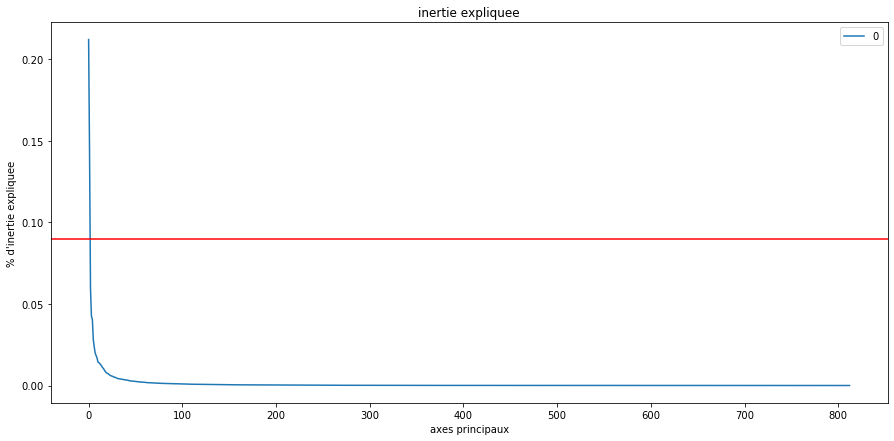

In [22]:
fig, ax = plt.subplots(figsize=(15, 7)) 

I.plot(ax=ax)

plt.title("inertie expliquee")
plt.xlabel("axes principaux")
plt.ylabel("% d'inertie expliquee")

plt.axhline(0.09, color="red")

plt.show() 

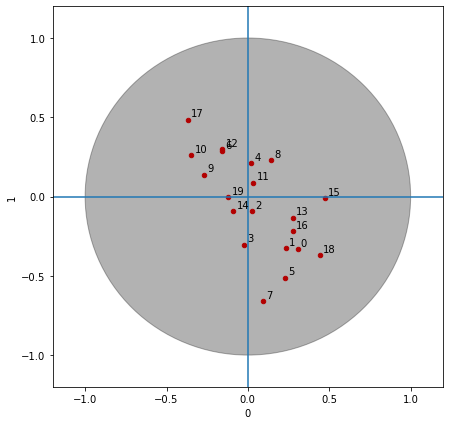

In [23]:
fig, ax = plt.subplots(figsize=(7, 7)) 

draw = correlations[:20].plot.scatter(x=0, y=1, ax=ax, color="red")


for index, row in correlations[:20].iterrows():
    draw.annotate(str(index), (row[0]+0.02, row[1]+0.02))

draw.add_patch(plt.Circle((0, 0), radius=1, color=(0, 0, 0, .3)))

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axvline(0)
plt.axhline(0)

plt.show()

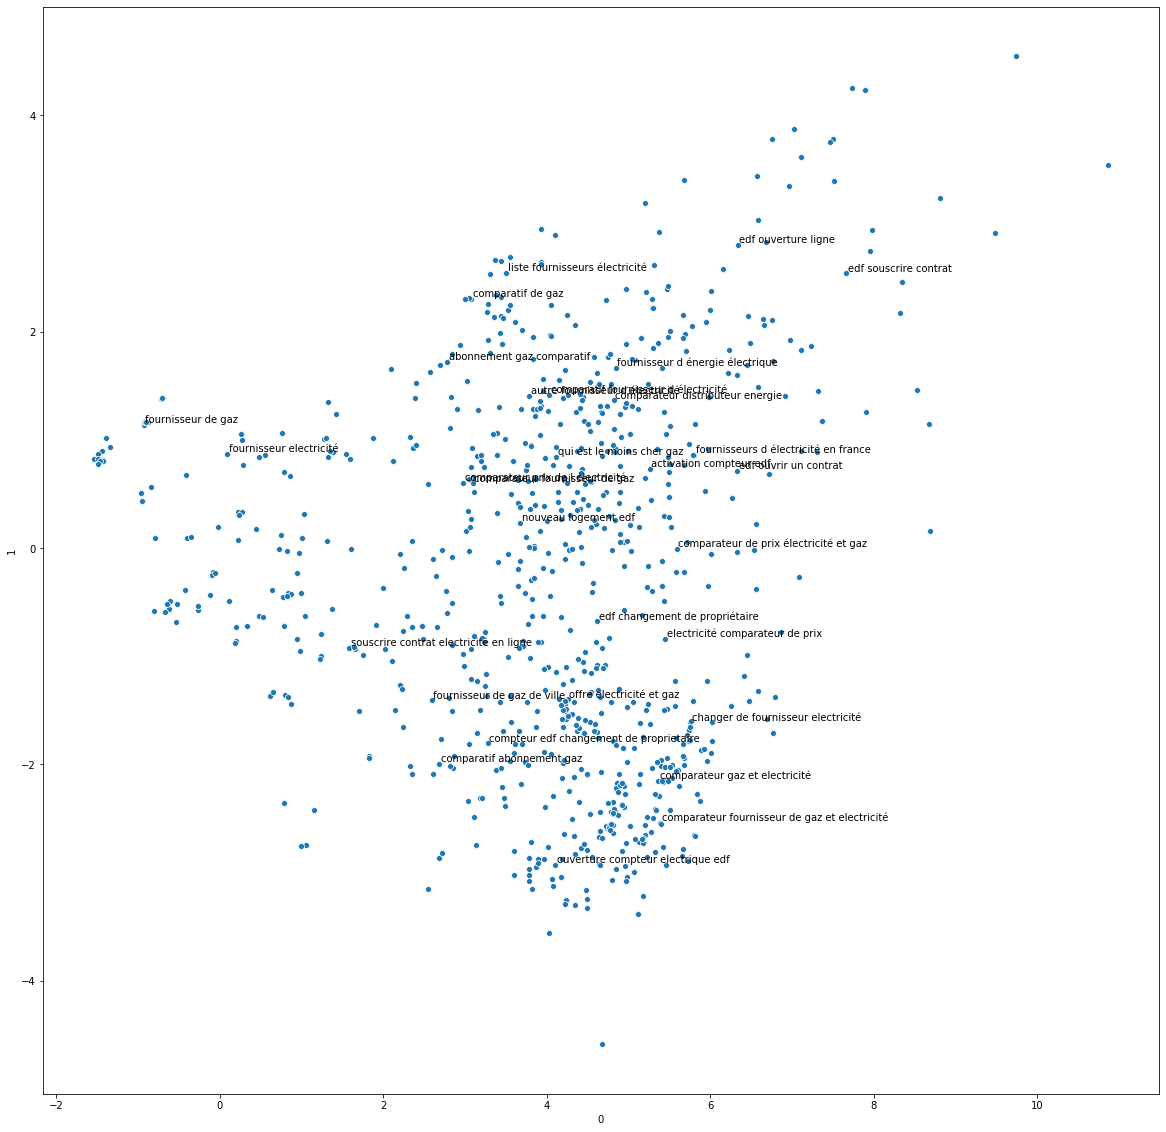

In [24]:
C["Keyword"]=df_vectors["Keyword"]

fig, ax = plt.subplots(figsize=(20, 20)) 
draw = sns.scatterplot(C[0],C[1]);

for index, row in C[:30].iterrows():
    draw.annotate(row["Keyword"], (row[0]+0.02, row[1]+0.02))

# Plot clustering on PCA components

In [25]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
C.loc[:,"labels"] = kmeans.labels_


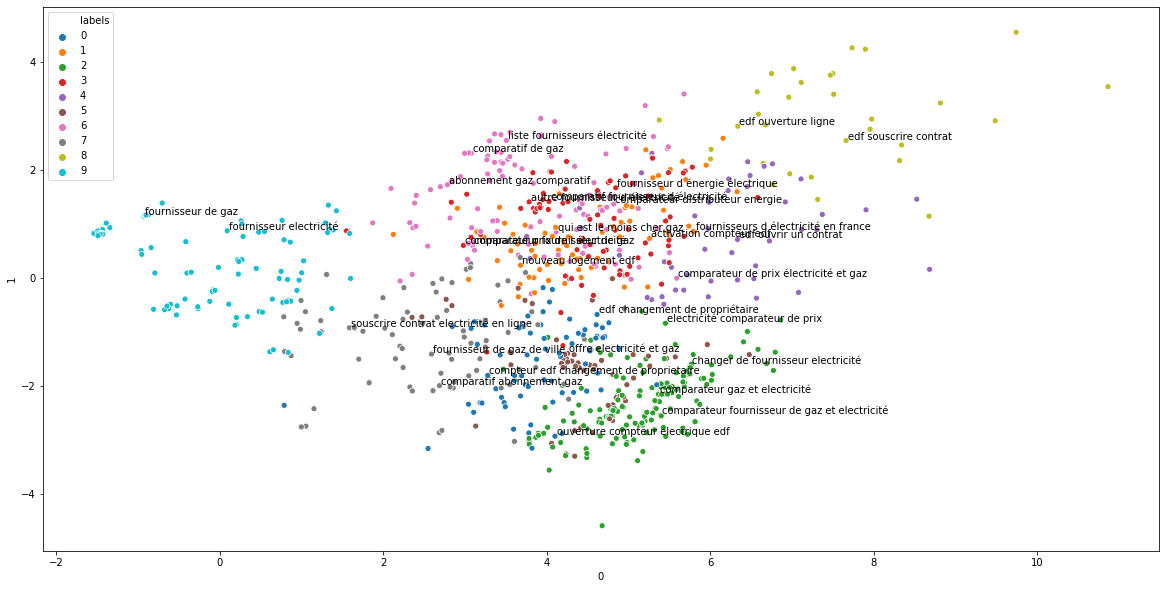

In [26]:
current_palette = sns.color_palette()
fig, ax = plt.subplots(figsize=(20, 10)) 
draw = sns.scatterplot(data=C, x=0, y=1, hue = 'labels', palette=current_palette);


for index, row in C[:30].iterrows():
    draw.annotate(row["Keyword"], (row[0]+0.02, row[1]+0.02))

In [27]:
C[C["labels"]==4]["Keyword"].unique()

array(['edf ouvrir un contrat', 'edf ouverture de compteur',
       'edf changement de contrat', 'edf contrat gaz',
       'edf activation compteur', 'ouverture compteur',
       'edf ouverture compteur', 'edf souscrire en ligne',
       'edf compteur ouverture', 'edf déménagement compteur',
       'edf ouvrir ligne', 'edf emménagement location',
       'numero edf souscrire contrat', 'edf ouverture compteur téléphone',
       'edf ouvrir une ligne', 'souscrire contrat gdf',
       'edf changement de titulaire', 'edf changement de nom compteur',
       'edf ouverture de ligne', 'edf emménager',
       'comparatif fournisseurs électricité',
       'edf demenagement transfert', 'edf ouvrir un abonnement',
       'energie comparatif', 'edf demenagement comment faire',
       'gdf ouverture compteur', 'edf et demenagement',
       'edf telephone ouverture compteur',
       'edf relevé de compteur déménagement',
       'edf changement nom compteur', 'edf changement domicile',
       'edf so

### Test with hierachircal clustering

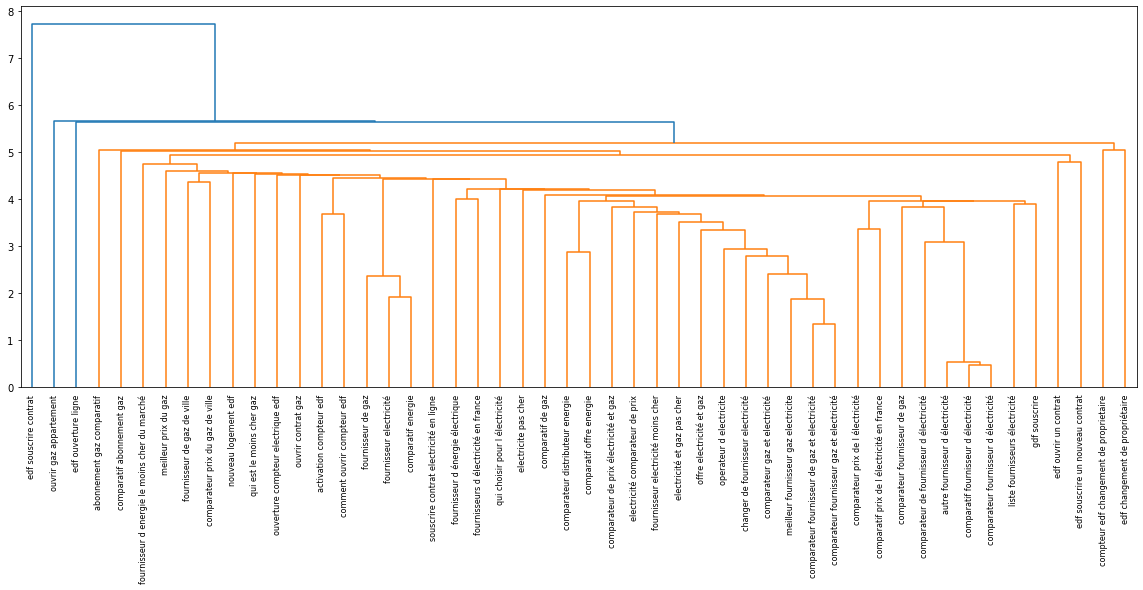

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X[:50], 'single')

labelList = list(y[:50])

plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

# Number of clusters

### With the within cluster sum of squares (elbow method)

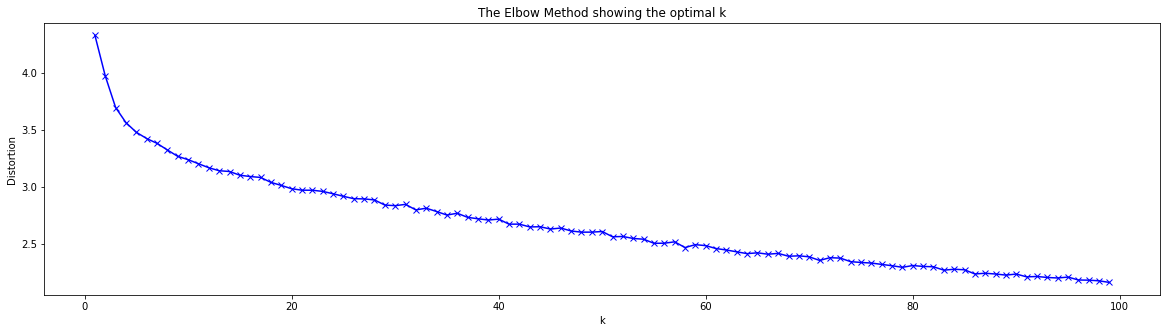

In [29]:
from scipy.spatial.distance import cdist

fig, ax = plt.subplots(figsize=(20, 5)) 

# k means determine k
distortions = []
K = range(1,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.show()

10 clustersd seem reasonable with the elbow method.

# See the coherence per adgroup

In [30]:
for keyword in df_gads["Keyword"].unique():
    df = df_gads[df_gads["Keyword"]==keyword]
    if len(df["Ad group"].unique()) > 1:
        print(keyword)

No keyword appear in two different ad group

In [31]:
keywords_list_original = df_vectors["Keyword"].apply(lambda x:"+"+x.replace(" "," +"))
keywords_list_original

0           +comparateur +prix +de +l +électricité
1                       +activation +compteur +edf
2              +electricité +comparateur +de +prix
3                        +fournisseur +electricité
4              +autre +fournisseur +d +électricité
                          ...                     
808                      +edf +déménagement +frais
809                      +demenagement +edf +frais
810    +frais +ouverture +compteur +edf +locataire
811                      +frais +edf +déménagement
812                      +frais +déménagement +edf
Name: Keyword, Length: 813, dtype: object

In [32]:
ad_groups = [df_gads[df_gads["Keyword"]==keyword]["Ad group"].iloc[0] for keyword in keywords_list_original]
C.loc[:,"Ad group"] = ad_groups

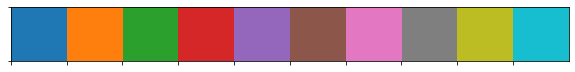

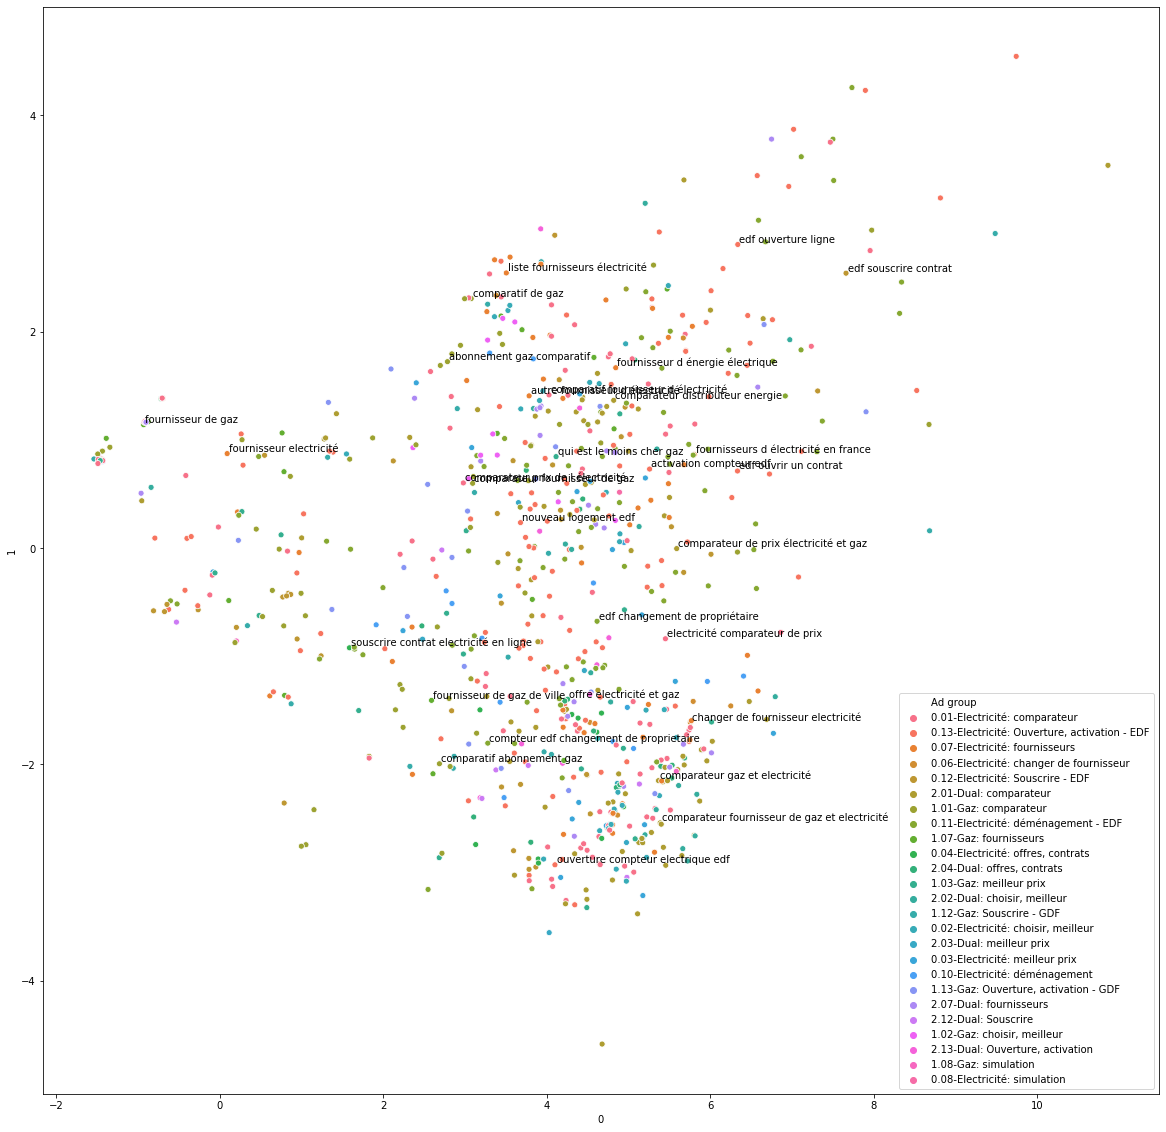

In [33]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

fig, ax = plt.subplots(figsize=(20, 20)) 
draw = sns.scatterplot(data=C, x=0, y=1, hue = 'Ad group');


for index, row in C[:30].iterrows():
    draw.annotate(row["Keyword"], (row[0]+0.02, row[1]+0.02))

Text(0.5, 1.0, 'Distribution of predicted labels per adgroup')

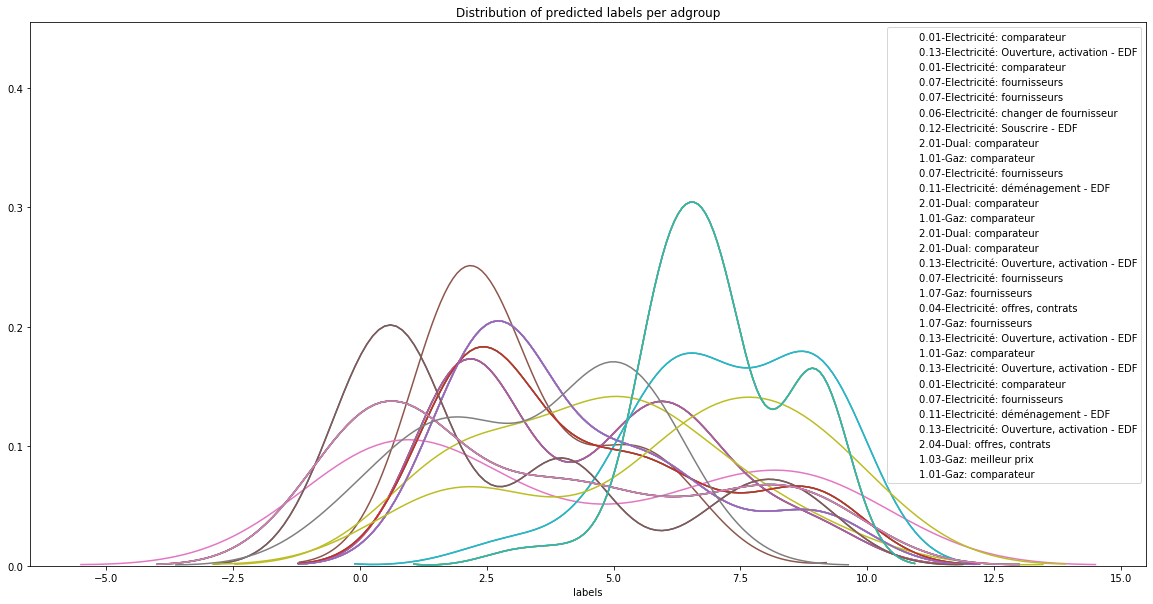

In [34]:
fig, ax = plt.subplots(figsize=(20, 10)) 

ad_groups_truncated = ad_groups[:30] 
for adgroup in ad_groups_truncated:
    df = C[C["Ad group"]==adgroup]
    sns.distplot(df["labels"], hist_kws={"alpha": 0})
plt.legend(ad_groups_truncated)
plt.title("Distribution of predicted labels per adgroup")

The adgroups doesn't seem to respect the semantic clusters identified by camemeBERT

example of adgroup:

In [35]:
C[C["Ad group"]=='0.04-Electricité: offres, contrats'][["Keyword","labels"]]

,Keyword,labels
18,souscrire contrat electricité en ligne,7
136,souscrire contrat electricité,2
144,contrat electricité,5
159,edf contrat electricité,2
179,abonnement électricité,9
195,abonnement electricite,5
227,abonnement electricité,5
358,nouveau contrat electricité,2
408,devis fournisseur electricité,2
485,contrat electricité edf,5


Incoherences of camemBERT:

In [36]:
df_vectors = df_vectors.set_index("Keyword")
compute_sin_sim("abonnement electricité","abonnement electricite",df_vectors)

abonnement electricité
abonnement electricite


0.9732008576393127

In [37]:
compute_sin_sim("abonnement électricité","abonnement electricite",df_vectors)

abonnement électricité
abonnement electricite


0.44837474822998047

We remark a problem with the sensibility of cammebert on accents.

# Try without accents and nb_clusters = len(adgroups)

In [38]:
df_gads["Keyword_simp"] = df_gads["Keyword"].apply(lambda keyword : keyword.replace("é","e").replace("è","e").replace("+",""))

In [39]:
keywords_list = df_gads["Keyword_simp"].unique()

In [40]:
df_vectors_accent = compute_coordinates(keywords_list)

comparateur prix de l electricite
activation compteur edf
electricite comparateur de prix
fournisseur electricite
autre fournisseur d electricite
changer de fournisseur electricite
edf souscrire contrat
comparateur fournisseur de gaz et electricite
comparatif abonnement gaz
fournisseur d energie electrique
compteur edf changement de proprietaire
comparateur de prix electricite et gaz
abonnement gaz comparatif
comparateur distributeur energie
comparateur gaz et electricite
ouverture compteur electrique edf
fournisseurs d electricite en france
fournisseur de gaz
souscrire contrat electricite en ligne
fournisseur de gaz de ville
nouveau logement edf
comparatif de gaz
edf ouvrir un contrat
comparatif fournisseur d electricite
liste fournisseurs electricite
edf changement de proprietaire
edf ouverture ligne
offre electricite et gaz
qui est le moins cher gaz
comparateur fournisseur de gaz
meilleur fournisseur gaz electricite
meilleur prix du gaz
comparatif offre energie
gdf souscrire
operate

electricite moins cher que choisir
fournisseur d electricite en france
fournisseurs d electricite comparatif
ouvrir un compte edf
comparateur offre energie
ouverture d un contrat edf
ouverture de ligne edf
edf demenagement compteur
activer compteur edf
electricite moins chere comparateur
prix ouverture compteur gaz
comment ouvrir un contrat edf
choisir fournisseur energie
choisir son fournisseur d electricite
quels sont les fournisseurs d electricite
changement de contrat edf
comparatif contrat electricite
ouverture edf en ligne
meilleur fournisseur de gaz
souscrire chez edf
comment ouvrir un compteur gaz
operateur electricite
fournisseurs gaz et electricite
comparer les tarifs d electricite
edf ouvrir compteur
autre fournisseur electricite
electricite fournisseur
edf ouvrir ligne
edf demenagement
souscrire edf gdf
comparateur gaz de ville
choisir fournisseur gaz et electricite
tarifs gaz comparatif
fournisseur d energie gaz
changement fournisseur electricite
fournisseur de gaz et d el

faire ouvrir un compteur edf
fournisseur de gaz le moins cher en france
ouvrir un compteur de gaz
contrat d electricite pas cher
comparaison prix gaz et electricite
comparateur de prix de gaz
edf emmenager numero
changement locataire compteur edf
numero edf ouverture compteur
changer nom contrat edf
comparatif fournisseur gaz et electricite
demenagement erdf
comparatif gaz que choisir
gdf ouverture de compteur
liste fournisseur gaz naturel
comment ouvrir une ligne edf
engie fournisseur electricite
fournisseur de electricite
edf appeler demenagement
dem electricite
comparatif distributeur electricite
electricite comparateur prix
electricite fournisseur comparatif
liste de fournisseur electricite
comparatif electricite tarif
operateur electricite comparatif
comparateur de fournisseur electricite
energie electricite pas cher
souscrire contrat gaz edf
ouvrir electricite appartement
comparatif energie gaz electricite
ouvrir compteur edf telephone
recherche fournisseur electricite
comparatif

In [41]:
df_vectors_accent = df_vectors_accent.reset_index()

In [1]:
X = df_vectors_accent.iloc[:,1:]
y = df_vectors_accent.iloc[:,0]

pca = PCA()
pca.fit(X)

U = np.transpose(pca.components_) # vecteurs propres
C = pd.DataFrame(X.dot(U), index=X.index) # nouvelles coordonnées
I = pd.DataFrame(np.transpose(pca.explained_variance_ratio_))  # information véhiculée

correlations = pd.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
quality = (C**2).div((X**2).sum(axis=1), axis='index')

NameError: name 'df_vectors_accent' is not defined

In [ ]:
kmeans = KMeans(n_clusters=25, random_state=0).fit(X)
C["Keyword"]= list(df_vectors_accent["Keyword"])
C["labels"] = kmeans.labels_
ad_groups = [df_gads[df_gads["Keyword_simp"]==keyword]["Ad group"].iloc[0] for keyword in df_vectors_accent["Keyword"]]
C["Ad group"] = ad_groups

In [ ]:
current_palette = sns.color_palette()
fig, ax = plt.subplots(figsize=(20, 20)) 
draw = sns.scatterplot(data=C, x=0, y=1, hue = 'labels', palette=current_palette*2+current_palette[:5]);


for index, row in C[:20].iterrows():
    draw.annotate(row["Keyword"], (row[0]+0.02, row[1]+0.02))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10)) 

ad_groups_truncated = ad_groups[:10] 
for adgroup in ad_groups_truncated:
    df = C[C["Ad group"]==adgroup]
    try:
        sns.distplot(df["labels"], hist_kws={"alpha": 0})
    except:
        continue
plt.title("Distribution of predicted labels per adgroup")

In [ ]:
C[C["Ad group"]=='0.04-Electricité: offres, contrats'][["Keyword","labels"]]

In [ ]:
len_labels = []
for label in C["labels"].unique():
    len_labels.append(len(C[C["labels"]==label]))
print(len_labels)

In [ ]:
C[C["labels"]==10]["Keyword"]

# Further tests on BERT

In [ ]:
list_test = ["souscrire contrat edf","edf souscrire contrat","Cadeau"]
df_test = compute_coordinates(list_test)

In [ ]:
print(compute_sin_sim(list_test[0],list_test[1],df_test))
print(compute_sin_sim(list_test[0],list_test[2],df_test))

# Sensitivity to temperature of identified clusters

### Looking at the sensitive keywords identified in the keyword_vs_temp notebook

In [ ]:
sensitive_keywords = ['+abonnement +electricité',
 '+fournisseur +electricite',
 '+comparatif +prix +kwh',
 '+electricité +moins +cher',
 '+fournisseur +electricité +moins +cher']
sensitive_keywords = list(map(lambda word:word.replace("é","e").replace("è","e").replace("+",""),sensitive_keywords))

In [ ]:
labels_of_sens_keywords = []
for keyword in sensitive_keywords:
    labels_of_sens_keywords.append(C[C["Keyword"]==keyword]["labels"].sum())

In [ ]:
labels_of_sens_keywords

# Performance per cluster

In [ ]:
C = C.set_index("Keyword")

In [ ]:
df_gads.loc[:,"label"] = df_gads["Keyword_simp"].apply(lambda keyword : C.loc[keyword]["labels"])

In [ ]:
df_group_label = process_any_report.groupby(df_gads,"label",day=False)
df_group_adgroup = process_any_report.groupby(df_gads,"Ad group",day=False)

In [ ]:
df_group_label_no_na = df_group_label.dropna().reset_index()
df_group_adgroup_no_na = df_group_adgroup.dropna().reset_index()

In [ ]:
column = "CPA"

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5)) 
df_sorted = df_group_label_no_na.sort_values(column,ascending=False).reset_index()
sns.barplot(data=df_sorted,x="label",y=column)
print(min(df_sorted[column]), np.argmin(df_group_label_no_na[column]))
print(max(df_sorted[column]), np.argmax(df_group_label_no_na[column]))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5)) 
df_sorted = df_group_adgroup_no_na.sort_values(column,ascending=False).reset_index()
sns.barplot(data=df_sorted,x="Ad group",y=column)
print(min(df_sorted[column]))
print(max(df_sorted[column]))

### The keywords / cost of the cluster

In [ ]:
#index = np.argmin(df_group_label_no_na[column])
index = 15

In [ ]:
list(df_gads[df_gads["label"]==index]["Keyword"].unique())

In [ ]:
df_gads[df_gads['label']==0]["Cost"].sum()

## Interesting clusters identified ith unsupervised clustering


- **the 0:** One identified cluster (index 0) with 31 keywords generated 0 conversions in total but it is explained by its very low click trough rate and its few number of impressions. It cost 60€ in total. It seems this cluster is mainly about keywords with both "edf" and "demenagement".

- **the 15:** very close to the 0 (axed on "déménagement"), with a very low click through rate. But it has the highest conversion rate and even the lowest CPA from far. 

- **the 13 :** seems to contain keywords with ("gaz et electricite"). It has a good CTR but a significantly low CPA, due to a good CVR.


# Separating adgroups per energy / aim

In [ ]:
df_gads["Ad group"].unique()

In [ ]:
df_gads.loc[:,"Adgroup_energy"] = list(df_gads["Ad group"].apply(lambda adgroup : adgroup.split("-")[1].split(":")[0]))
df_gads.loc[:,"Adgroup_aim"] = list(df_gads["Ad group"].apply(lambda adgroup : adgroup.split("-")[1].split(":")[1]))

In [ ]:
ad_groups_energy = [df_gads[df_gads["Keyword_simp"]==keyword]["Adgroup_energy"].iloc[0] for keyword in keywords_list]
ad_groups_aim = [df_gads[df_gads["Keyword_simp"]==keyword]["Adgroup_aim"].iloc[0] for keyword in keywords_list]

In [ ]:
C.loc[:,"Adgroup_energy"] = ad_groups_energy
C.loc[:,"Adgroup_aim"] = ad_groups_aim

In [ ]:
mylist = ['nowplaying', 'PBS', 'PBS', 'nowplaying', 'job', 'debate', 'thenandnow']
myset = set(mylist)
print(myset)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10)) 

ad_groups_truncated = ad_groups[:10] 
for adgroup in C["Adgroup_energy"].unique():
    df = C[C["Adgroup_energy"]==adgroup]
    try:
        sns.distplot(df["labels"], hist_kws={"alpha": 0.09})
    except:
        continue
plt.title("Distribution of predicted labels per adgroup")
plt.legend(C["Adgroup_energy"].unique())

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10)) 

ad_groups_truncated = ad_groups[:10] 
for adgroup in C["Adgroup_aim"].unique():
    df = C[C["Adgroup_aim"]==adgroup]
    try:
        sns.distplot(df["labels"], hist_kws={"alpha": 0.05})
    except:
        continue
plt.title("Distribution of predicted labels per adgroup")
plt.legend(C["Adgroup_aim"].unique())

# Same work with queries

In [ ]:
df_query = process_any_report.open_and_process("report_query", start_date="2019-11")

In [ ]:
df_vector_queries = be.compute_coordinates_sentence(list_queries[:100])